In [1]:
dataset = "mrf_data"

In [2]:
from MRF import *
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
data_in = pd.read_csv(f"/Users/ryanlucas/Desktop/MacroRandomForest/Datasets/{dataset}.csv")

In [5]:
oos_pos = np.arange(data_in.index[-50], data_in.index[-1]+1)
# oos_pos = np.arange(150, 200)

print(oos_pos)

[150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199]


In [6]:
MRF = MacroRandomForest(data=data_in,
                        y_pos=0,
                        x_pos=np.arange(1,4), 
                        fast_rw = False, 
                        B = 1000, 
                        mtry_frac=0.25, 
                        oos_pos=oos_pos, 
                        trend_push=4,
                        quantile_rate=0.3, 
                        print_b = True, 
                        parallelise=False)

In [7]:
mrf_output = MRF._ensemble_loop()

Tree 1 out of 1000
------old------
[-2.18844138 -1.10561845 -2.33712814 -1.52808356  0.06794479  0.1887753
 -0.94627377 -0.8709725   0.06116486  0.6111882  -1.99658108 -0.26042042
 -0.13564182  0.82347307  1.28839597  1.44251874 -1.30763851  0.96984888
  0.43761903  0.54461396  0.26341946 -0.07492507 -0.91618314 -0.97187463
  0.09518167 -0.17987795 -0.44934276 -0.17042962 -0.49697227  0.10529311
 -0.1602407 ]
[[ 1.         -0.36263729 -1.33932574 -1.44626077]
 [ 1.         -1.13504143  0.32531523 -0.95262604]
 [ 1.         -0.23677557 -0.379313   -1.11424944]
 [ 1.         -1.64934722 -1.93229331  1.45872257]
 [ 1.         -0.55266972  1.63112725  0.36842214]
 [ 1.          0.24801142 -0.10802117  0.47542262]
 [ 1.         -2.00561476 -0.21803027 -0.53639061]
 [ 1.         -0.46685822 -0.05771516  0.06750923]
 [ 1.         -0.69836507  0.92495746 -1.03749885]
 [ 0.75        0.26039307  0.18172745  0.4029474 ]
 [ 0.75       -0.20948414 -1.0856437  -0.93838284]
 [ 0.75       -0.11097436 

Exception: 

In [ ]:
mrf_output.keys()

dict_keys(['YandX', 'pred_ensemble', 'pred', 'S_names', 'betas', 'betas_draws_raw', 'betas_draws', 'model'])

In [ ]:
profile_code = True
if profile_code:
    %load_ext line_profiler
    %lprun -f MRF._splitter_mrf MRF._one_MRF_tree(1)

Tree 2 out of 1000


Timer unit: 1e-06 s

Total time: 2.10559 s
File: /Users/ryanlucas/Desktop/MacroRandomForest/Python/MRF.py
Function: _splitter_mrf at line 730

Line #      Hits         Time  Per Hit   % Time  Line Contents
   730                                               def _splitter_mrf(self, x, y, z, whos_who, rando_vec, rw_regul_dat):
   731                                           
   732        76       3259.0     42.9      0.2          x = np.array(x)
   733        76       2844.0     37.4      0.1          uni_x = np.unique(x)
   734        76        746.0      9.8      0.0          splits = sorted(uni_x)
   735                                           
   736        76       7966.0    104.8      0.4          z = np.column_stack([np.ones(len(z)), z])
   737        76        240.0      3.2      0.0          min_frac_times_no_cols = self.min_leaf_fracz*z.shape[1]
   738                                           
   739        76       2421.0     31.9      0.1          y_as_list = np.array(y

In [ ]:
phils_preds = pd.read_csv("/Users/ryanlucas/Desktop/MRF/predictions.csv", index_col = "Unnamed: 0")

In [ ]:
my_preds = pd.DataFrame(mrf_output['pred_ensemble'])

In [ ]:
phils_preds.columns = my_preds.columns

In [ ]:
phils_betas = pd.read_csv("/Users/ryanlucas/Desktop/mrf_betas.csv", index_col = "Unnamed: 0")

In [ ]:
my_betas = pd.DataFrame(mrf_output['betas'])

In [ ]:
phils_betas.columns = my_betas.columns

In [ ]:
abs(my_betas.subtract(phils_betas)).describe()

,0,1,2,3
count,199.000000,199.000000,199.000000,199.000000
mean,0.030810,0.038378,0.035103,0.036736
std,0.021953,0.028502,0.029839,0.026006
min,0.000048,0.000316,0.000378,0.000631
25%,0.015305,0.015617,0.015256,0.015752
50%,0.026961,0.035114,0.027774,0.029598
75%,0.040771,0.053800,0.045099,0.051737
max,0.097117,0.181995,0.157878,0.126190


Text(0.5, 0.98, '50 iterations of the NS dataset: betas from Python and R implementation. Python (light) and R (dark) colors.')

Text(0.5, 1.0, '$\\beta_0$')

Text(0.5, 1.0, '$\\beta_1$')

Text(0.5, 1.0, '$\\beta_2$')

Text(0.5, 1.0, '$\\beta_3$')

Text(0.5, 0, '$t$')

Text(0.5, 0, '$t$')

Text(0, 0.5, 'Coefficient')

Text(0, 0.5, 'Coefficient')

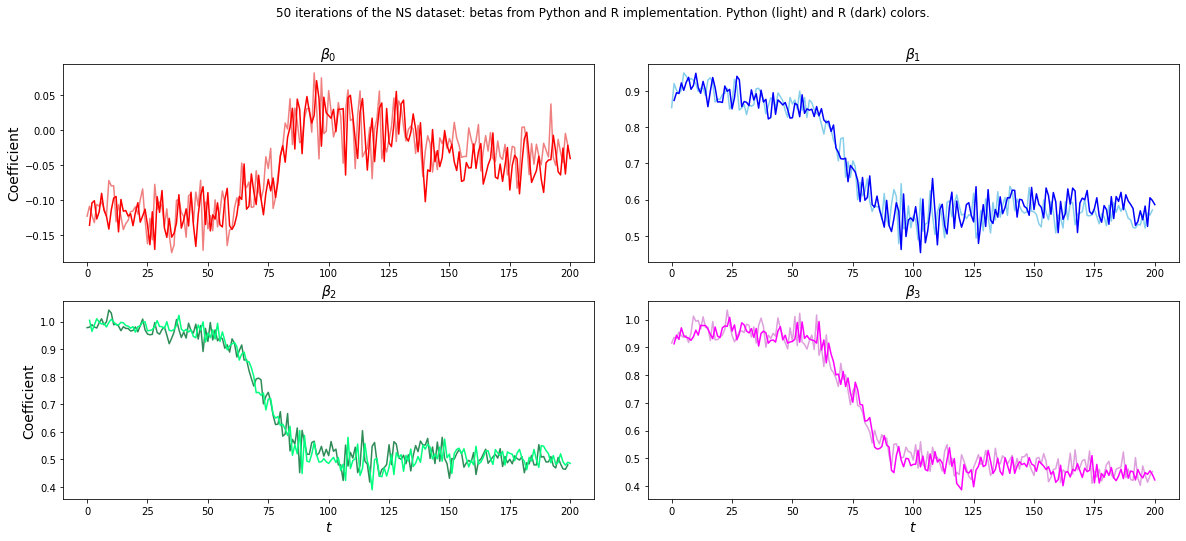

In [ ]:
fig, ax =plt.subplots(nrows = 2, ncols = 2, gridspec_kw={"wspace": 0.1})

plt.suptitle(f"50 iterations of the NS dataset: betas from Python and R implementation. Python (light) and R (dark) colors.", )

phils_preds_on = True
my_preds_on = True

plt.rcParams['figure.figsize'] = (20,15)
color_list_0 = ['lightcoral', 'skyblue', 'seagreen', 'plum']
color_list_1 = ['red', 'blue', 'springgreen', 'magenta']

if my_preds_on:
    ax[0, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 0], color = color_list_0[0])
    ax[0, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 1], color = color_list_0[1])
    ax[1, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 2], color = color_list_0[2])
    ax[1, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 3], color = color_list_0[3])

if phils_preds_on:
    ax[0, 0].plot(pd.DataFrame(phils_betas).iloc[:, 0], color_list_1[0])
    ax[0, 1].plot(pd.DataFrame(phils_betas).iloc[:, 1], color_list_1[1])
    ax[1, 0].plot(pd.DataFrame(phils_betas).iloc[:, 2], color_list_1[2])
    ax[1, 1].plot(pd.DataFrame(phils_betas).iloc[:, 3], color_list_1[3])

ax[0, 0].set_title(r"$\beta_0$", fontsize = 14)
ax[0, 1].set_title(r"$\beta_1$", fontsize = 14)
ax[1, 0].set_title(r"$\beta_2$", fontsize = 14)
ax[1, 1].set_title(r"$\beta_3$", fontsize = 14)

ax[1, 0].set_xlabel(r"$t$", fontsize = 14)
ax[1, 1].set_xlabel(r"$t$", fontsize = 14)

ax[0, 0].set_ylabel("Coefficient", fontsize = 14)
ax[1, 0].set_ylabel("Coefficient", fontsize = 14)

In [ ]:
my_preds.columns = np.arange(0, len(my_preds.columns))

In [ ]:
phils_preds

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1,1.349806,0.180712,-1.186944,-0.754992,-1.514623,-1.977883,-0.336892,-1.062164,0.834006,-0.661748,...,-0.558676,-0.629327,0.720648,-0.687142,0.489531,0.065547,0.226997,-0.031864,0.052486,0.306759
2,1.898409,-0.288065,-1.313202,-0.545862,-1.667455,-2.061401,0.385928,-1.042117,0.809721,-0.133316,...,-0.377439,-0.393655,0.092532,-0.904682,0.645976,0.179255,0.479441,0.418490,0.341491,0.399667
3,1.570607,-0.438637,-1.317893,-0.778726,-1.862025,-2.320344,0.300456,-1.131551,0.918677,-0.204435,...,-0.672796,-0.196113,0.558818,-1.363611,0.305961,0.115832,0.592722,0.007034,-0.008489,0.588272
4,1.747219,-0.415341,-0.966378,-0.839822,-1.773510,-2.356445,0.651972,-1.056500,0.855154,-0.245691,...,-0.767257,-0.332863,0.341695,-0.814499,0.587360,0.084666,0.600810,0.127399,0.077653,0.494936
5,1.865043,-0.535328,-0.933705,-0.995620,-1.729946,-2.698973,0.600570,-1.376541,0.778476,-0.412946,...,-0.541432,-0.742641,0.244710,-1.592797,0.788317,0.088180,0.550248,0.190950,0.170364,0.584338
6,1.260959,-0.261499,-1.238203,-0.638612,-1.855403,-2.257270,0.576828,-1.151683,0.790914,-0.311024,...,-0.540497,-0.437615,0.394409,-1.137999,0.506152,0.061569,0.650643,0.323913,-0.131452,0.499920
7,1.745587,-0.354224,-1.390342,-0.783399,-2.119864,-2.320638,0.671006,-1.860832,0.579158,-0.375423,...,-0.607008,-0.643102,0.036748,-1.461069,0.589714,0.051635,0.469869,0.388231,-0.084217,0.505360
8,1.515276,-0.471122,-0.794966,-0.651261,-1.226967,-1.684031,-0.115242,-1.112598,0.821897,-0.364741,...,-0.476504,-0.448352,0.595028,-0.629603,0.504118,0.106613,0.414446,0.164812,-0.205257,0.142235
9,1.988158,-0.274719,-0.733097,-0.556237,-1.570551,-1.671721,0.781237,-1.446319,1.383922,-0.465986,...,-0.919889,-0.462052,0.367186,-1.276422,0.566607,0.142046,0.403517,0.395224,-0.059286,0.210300
10,1.347008,-0.174337,0.058885,-0.420232,-1.676530,-1.624745,0.411319,-1.238788,0.554519,-0.374308,...,-0.590336,-0.228729,0.229894,-0.759296,0.315231,0.398791,0.452283,0.107175,0.004498,0.453392


Text(0, 0.5, 'Ensemble Predictions')

Text(0.5, 0, '$t$')

Text(0.5, 1.0, '50 iterations of the NS dataset: R versus Python implementation, average of forecasts')

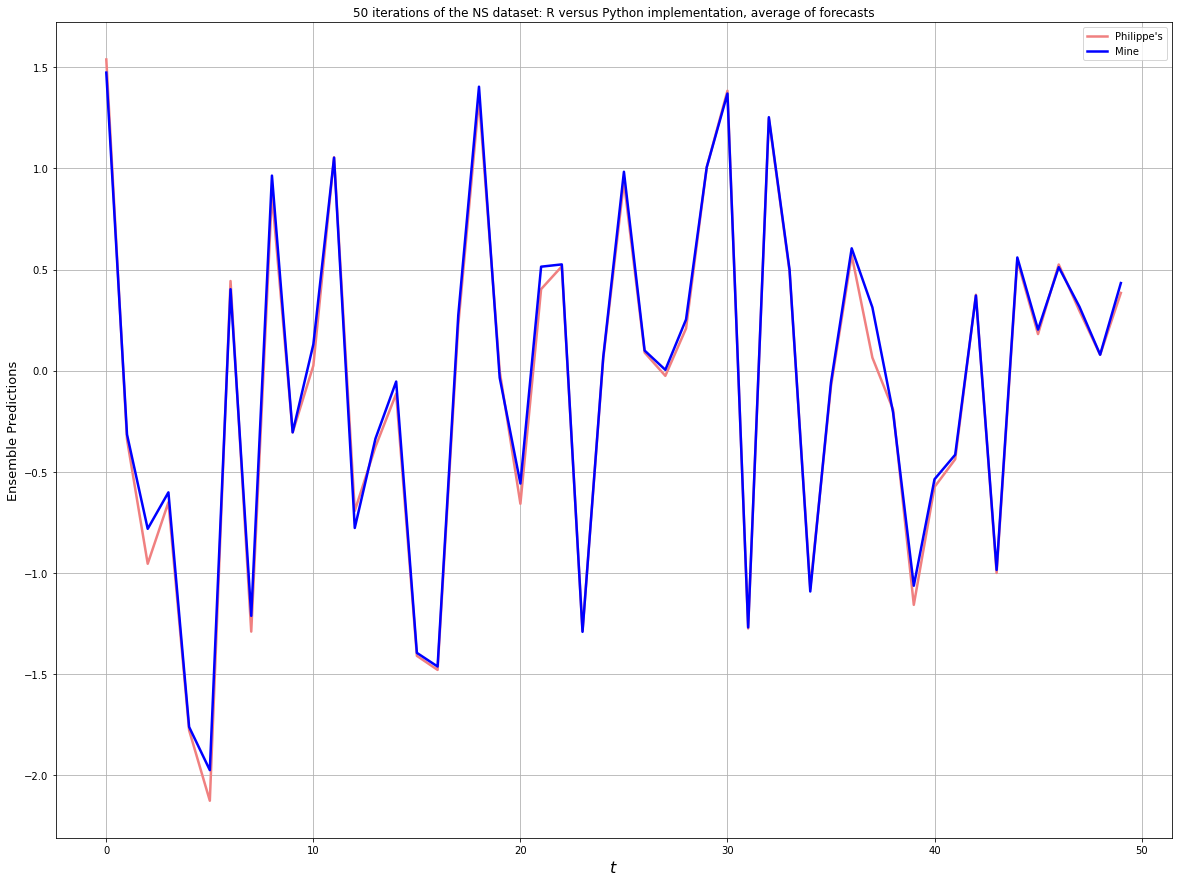

In [ ]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)
ax.plot(phils_preds.mean(axis = 0), color = 'lightcoral', linewidth = 2.5, label = "Philippe's")

ax.plot(my_preds.mean(axis = 0), color = 'blue', linewidth = 2.5, label = "Mine")

# ax.plot(y, label = 'actual', color = 'magenta', linewidth = 2.5)
ax.legend()
ax.set_ylabel("Ensemble Predictions", fontsize = 13)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("50 iterations of the NS dataset: R versus Python implementation, average of forecasts")
# ax.plot(y, color = 'green', linewidth = 3)